## Netflix Best Movie and series recommendation by P.Sreekanth Reddy from 6B13 division

### Problem Statement

Netflix, the popular streaming service, is looking to enhance its recommendation system to provide users with personalized suggestions for
movies and series. The current recommendation system relies on basic user preferences but lacks the finesse to recommend the best
content based on individual tastes and watching patterns.

The goal is to develop an advanced recommendation algorithm that takes into account various factors such as genre preferences, viewer
ratings, historical watching behavior, and possibly external data sources to suggest the most appealing movies and series for each user.

### 1. Explore the Dataset

#### 1.1 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 1.2 import and display  basic information of the dataset

In [2]:
netflix_df = pd.read_csv("netflix.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
netflix_df.shape

(8807, 12)

In [4]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### EDA and Feacture Engineering

In [7]:
data = netflix_df.copy()
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Separating the date added into day,month,year

In [8]:
from dateutil import parser
data['date_added'] = data['date_added'].apply(lambda x: parser.parse(x, fuzzy=True) if pd.notnull(x) else None)

In [9]:
data['data_added_day'] = data['date_added'].dt.day
data['data_added_month'] = data['date_added'].dt.month
data['data_added_year'] = data['date_added'].dt.year

In [10]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,data_added_day,data_added_month,data_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0


#### Remove the date added

In [11]:
data.drop(['date_added'], axis=1, inplace=True)

In [12]:
data.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_day,data_added_month,data_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0


In [13]:
data.dtypes

show_id              object
type                 object
title                object
director             object
cast                 object
country              object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
data_added_day      float64
data_added_month    float64
data_added_year     float64
dtype: object

### 2. Data Visualisation

#### 2.1 Pie chart for "type"

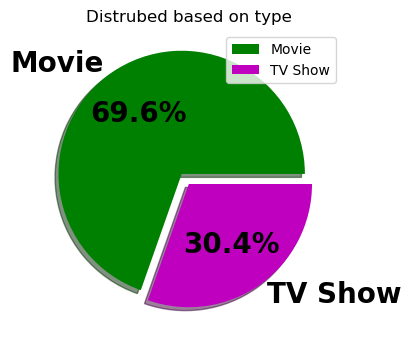

In [14]:
plt.figure(figsize=(10, 4)) 
plt.pie(data['type'].value_counts(), labels=data['type'].value_counts().keys(), explode=[0.1,0.0],autopct='%1.1f%%', textprops={'fontsize': 20, 'fontweight': 'bold'}, colors=['g', 'm'], shadow=True) 
plt.title('Distrubed based on type')
plt.legend(loc = 1)
plt.show()

#### 2.2 Bar Plot

In [15]:
####  Who are the top 10 directors with the most content?

Top 10 directors with the most content:
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64


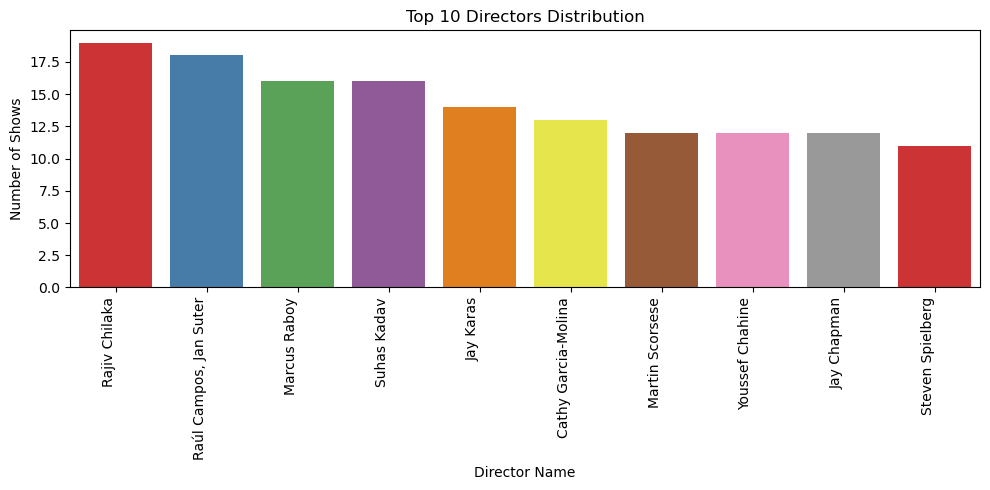

In [16]:
top_directors = data['director'].value_counts().head(10)
print("Top 10 directors with the most content:")
print(top_directors)

# Plot a bar plot for the top 10 directors
plt.figure(figsize=(10, 5))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='Set1')
plt.xlabel('Director Name')
plt.ylabel('Number of Shows')
plt.title('Top 10 Directors Distribution')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [17]:
#  Which countries are most represented in the dataset?

Top 10 countries represented in the dataset:
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64


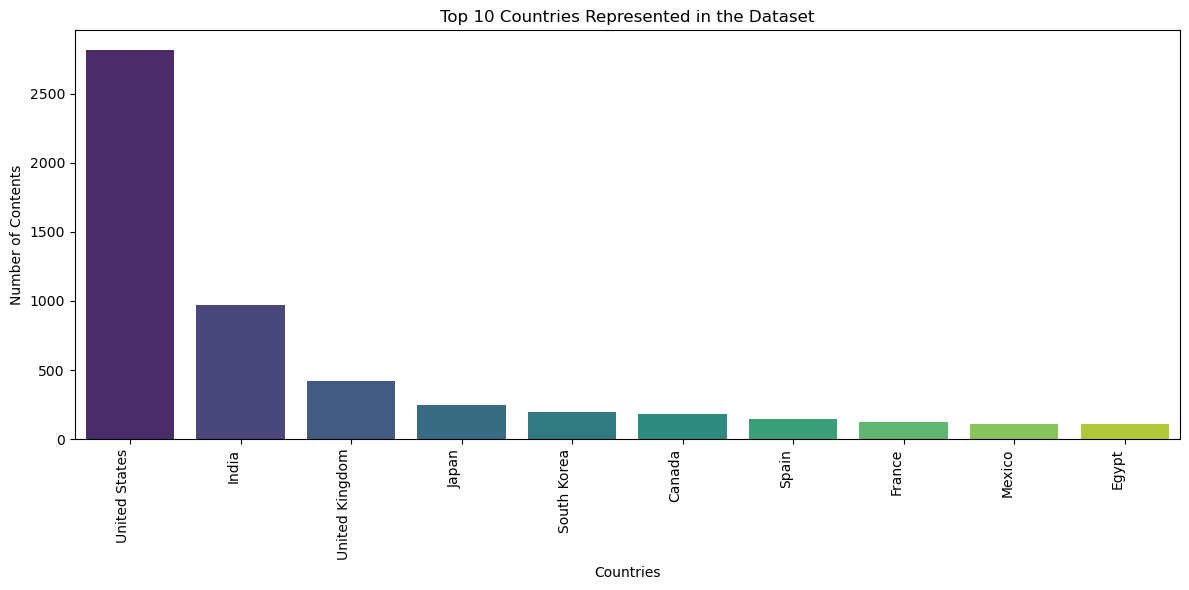

In [18]:
top_countries = data['country'].value_counts().head(10)
print("Top 10 countries represented in the dataset:")
print(top_countries)

# Plot a bar plot for the most represented countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values,  palette='viridis')
plt.xlabel('Countries')
plt.ylabel('Number of Contents')
plt.title('Top 10 Countries Represented in the Dataset')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [19]:
# What are the top 10 most common content categories?

Top 10 most common content categories:
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: listed_in, dtype: int64


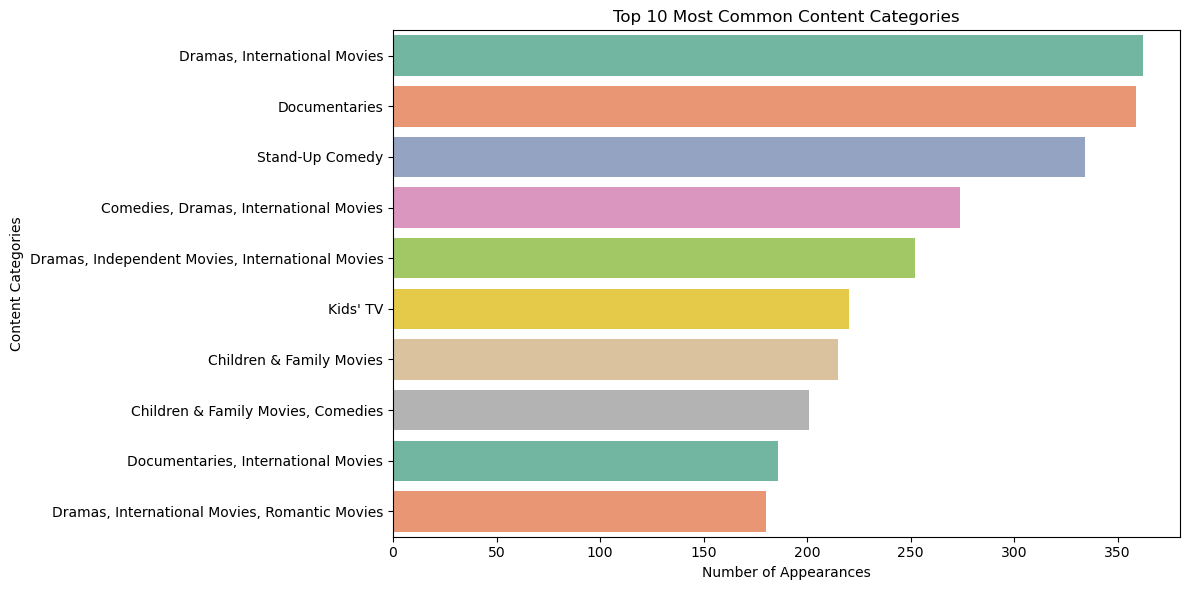

In [20]:
top_categories = data['listed_in'].value_counts().head(10)
print("Top 10 most common content categories:")
print(top_categories)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='Set2')
plt.xlabel('Number of Appearances')
plt.ylabel('Content Categories')
plt.title('Top 10 Most Common Content Categories')
plt.tight_layout()
plt.show()

#### 2.3 Count plot

In [21]:
# What is the distribution of content added dates according year?

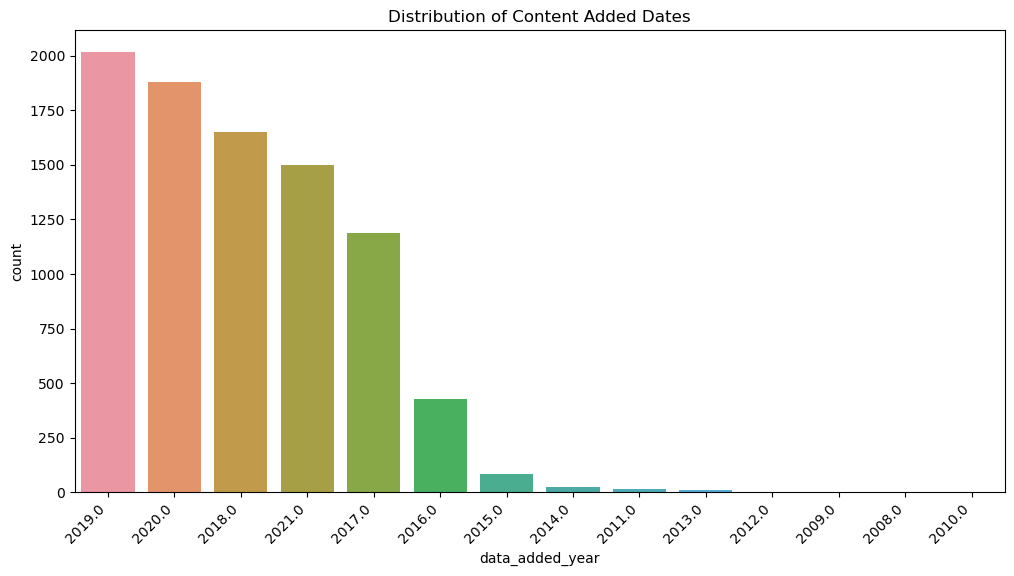

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x='data_added_year', data=data, order=data['data_added_year'].value_counts().index)
plt.title('Distribution of Content Added Dates')
plt.xticks(rotation=45, ha='right')
plt.show() 

In [23]:
# What is the distribution of content added dates according month?

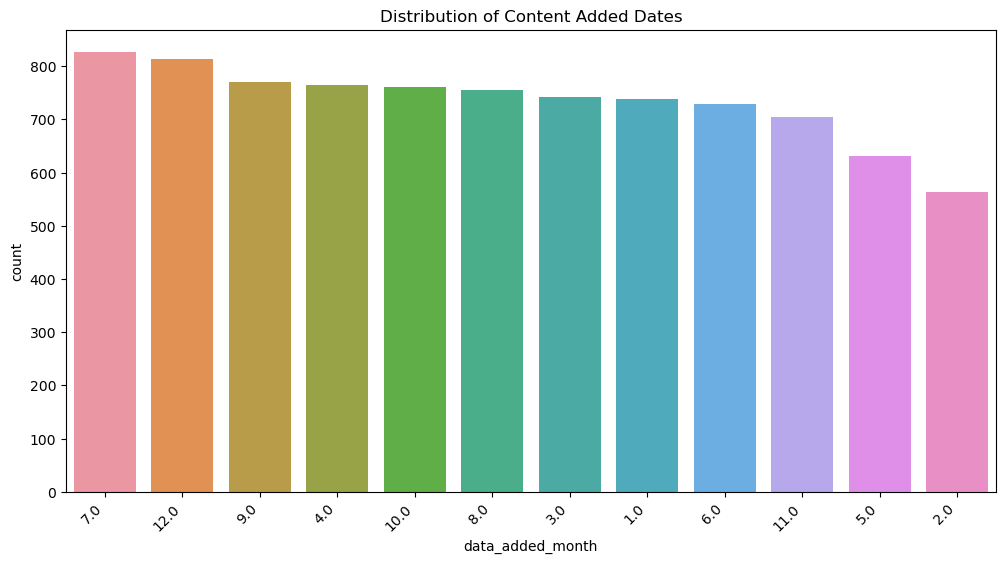

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(x='data_added_month', data=data, order=data['data_added_month'].value_counts().index)
plt.title('Distribution of Content Added Dates')
plt.xticks(rotation=45, ha='right')
plt.show() 

#### 2.4 Hist plot

In [25]:
# What is the distribution of release years for content?

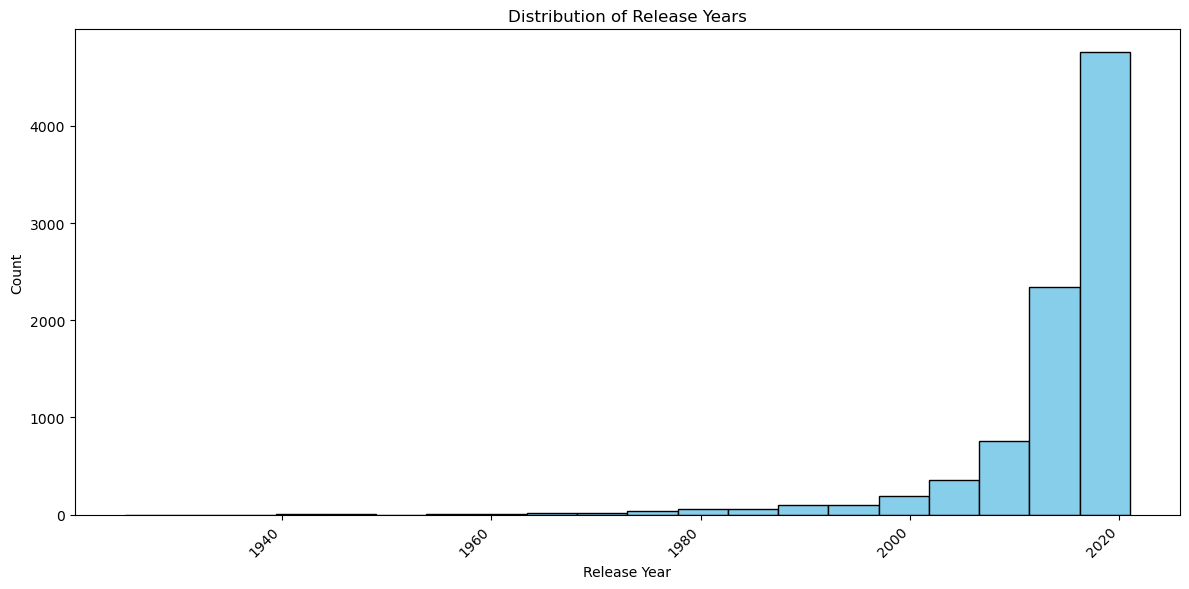

In [26]:
plt.figure(figsize=(12, 6))
plt.hist(data['release_year'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
# What is the distribution of content ratings?

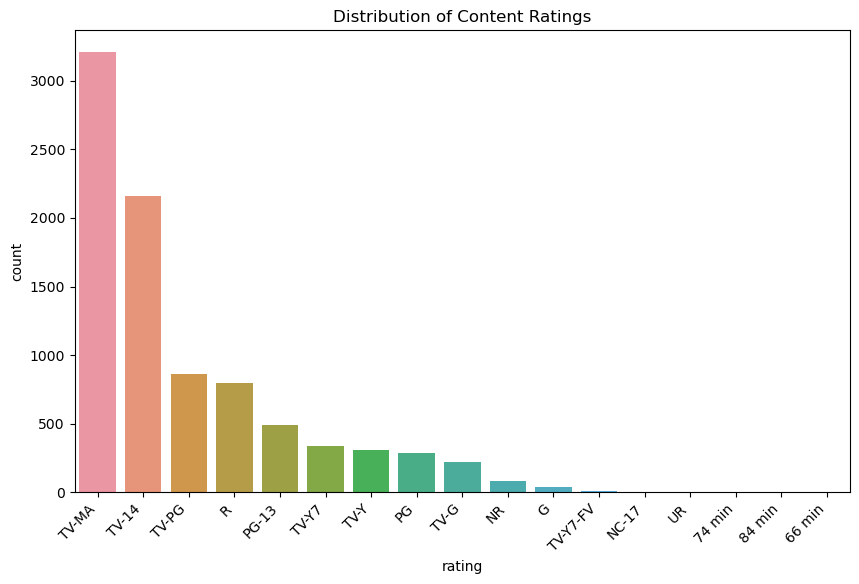

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=data, order=data['rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

In [29]:
# What is the distribution of content durations for movies and TV shows?

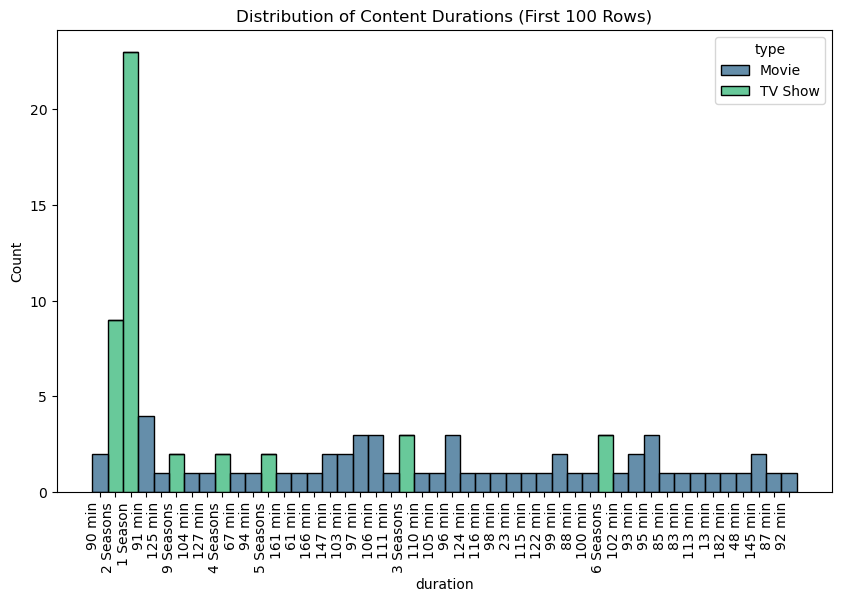

In [30]:
subset_data = data.head(100)

# Create a histogram plot for the distribution of content durations
plt.figure(figsize=(10, 6))
sns.histplot(x='duration', data=subset_data,multiple='stack', hue='type', bins=20, palette='viridis')
plt.title('Distribution of Content Durations (First 100 Rows)')
plt.xticks(rotation=90, ha='right')
plt.show() 

In [31]:
# What are the word frequencies in content descriptions?
# Most common words in Description 

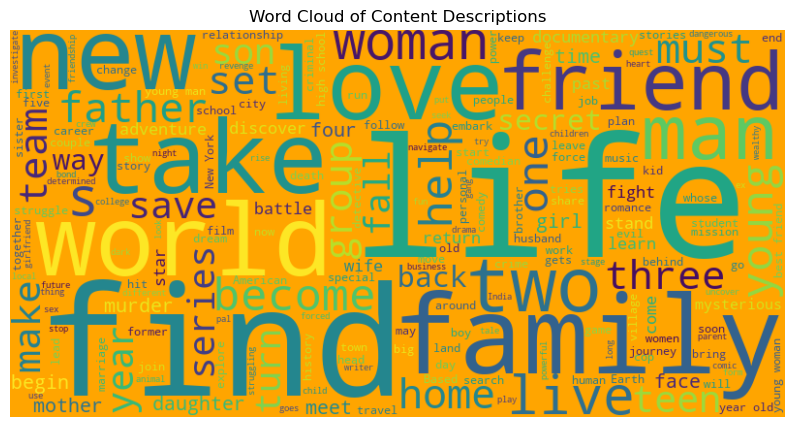

In [32]:
from wordcloud import WordCloud

text = ' '.join(data['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='orange').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Content Descriptions')
plt.show() 

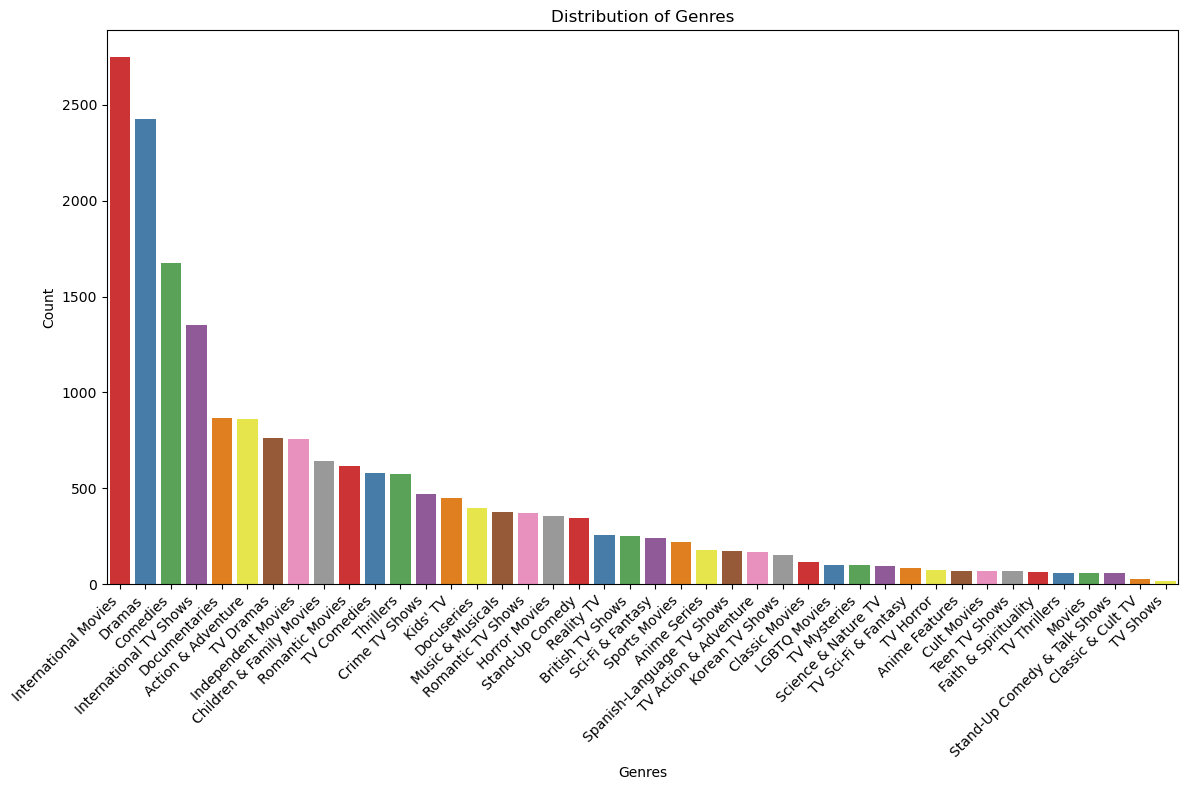

In [33]:
# Plot the distribution of genres

# Filter out non-string values and use explode to transform the 'genres' column
genre_counts = data['listed_in'].dropna().apply(lambda x: x.split(', ')).explode().value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Set1')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Genres')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

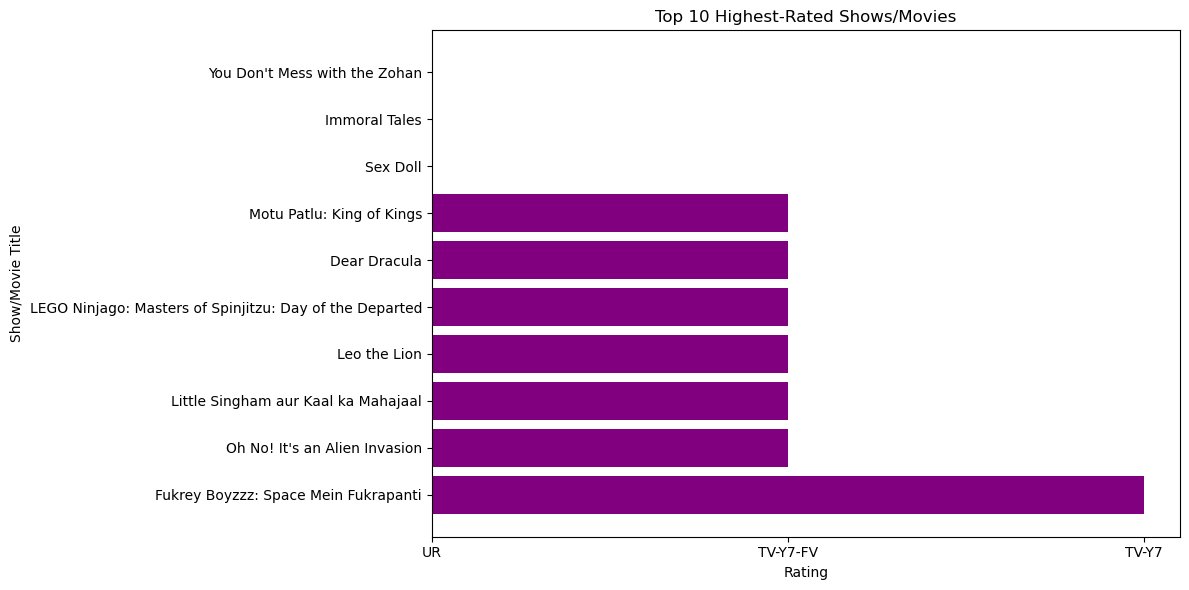

In [34]:
# Top 10 Highest-Rated Shows/Movies

sorted_df = data.sort_values(by='rating', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(sorted_df['title'], sorted_df['rating'], color = 'purple')
plt.xlabel('Rating')
plt.ylabel('Show/Movie Title')
plt.title('Top 10 Highest-Rated Shows/Movies')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

### 3.Data Preprocessing

In [35]:
# Checking Duplicates Data
data.duplicated().sum()

0

In [36]:
# Checking Cardinality of Categorical features
data.select_dtypes(include='object').nunique()

show_id        8807
type              2
title          8807
director       4528
cast           7692
country         748
rating           17
duration        220
listed_in       514
description    8775
dtype: int64

#### 3.1 Identifing missing values

In [37]:
data.isnull().sum() 

show_id                0
type                   0
title                  0
director            2634
cast                 825
country              831
release_year           0
rating                 4
duration               3
listed_in              0
description            0
data_added_day        10
data_added_month      10
data_added_year       10
dtype: int64

#### 3.2 Checking Total Number & Percentage of Missing Values in Training Dataset

In [38]:
df = (data.isnull().sum()[data.isnull().sum() > 0]).to_frame().rename(columns={0:'Number of Missing Values'})
df['% of Missing Values'] = round(100 * data.isnull().sum()[data.isnull().sum() > 0] / len(data), 2)

In [39]:
df

,Number of Missing Values,% of Missing Values
director,2634,29.91
cast,825,9.37
country,831,9.44
rating,4,0.05
duration,3,0.03
data_added_day,10,0.11
data_added_month,10,0.11
data_added_year,10,0.11


#### 3.3 Visualise the missing values

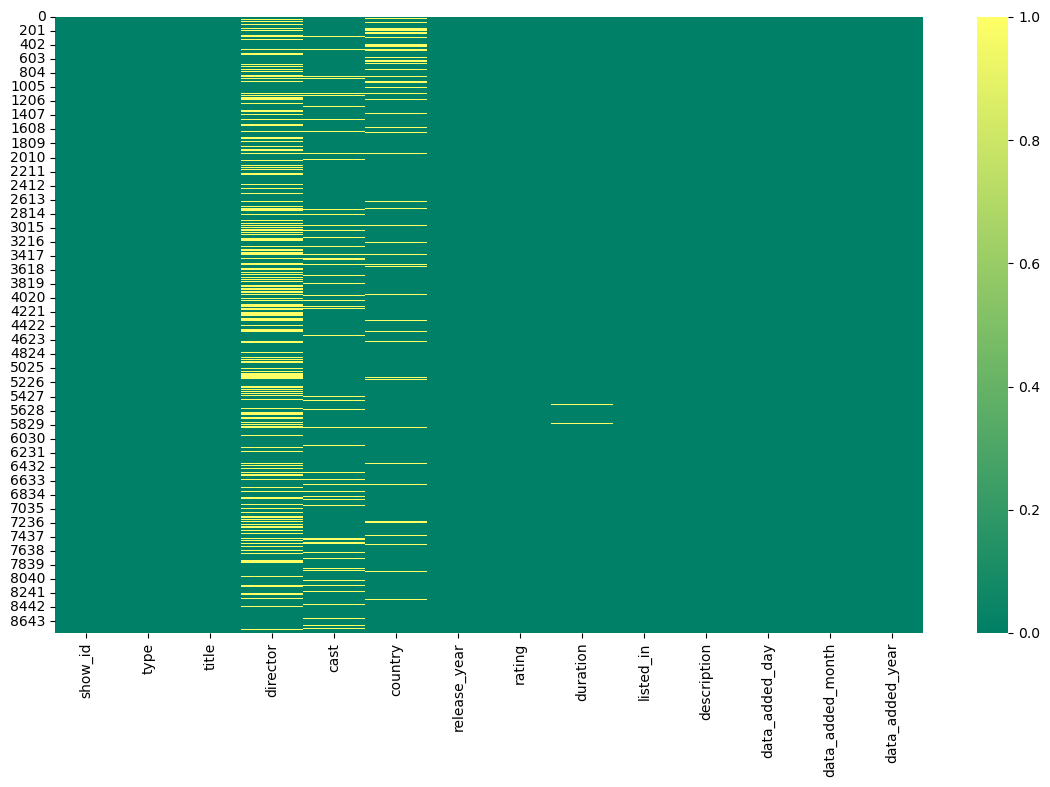

In [40]:
plt.figure(figsize=(14, 8))
sns.heatmap(data.isnull(), cmap='summer')
plt.show()

#### 3.4 Handling the Missing values

In [41]:
cat_cols = [col for col in data.columns if data[col].dtype=="object"]
num_cols = [col for col in data.columns if data[col].dtype!="object"] 

In [42]:
print("cat columns : ",cat_cols)
print("Num Columns are : ",num_cols)

cat columns :  ['show_id', 'type', 'title', 'director', 'cast', 'country', 'rating', 'duration', 'listed_in', 'description']
Num Columns are :  ['release_year', 'data_added_day', 'data_added_month', 'data_added_year']


#### Using Simple Imputer Library to Fill Missing Values

In [43]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(strategy="most_frequent")   ##To fill Categorical Features.
imputer2 = SimpleImputer(strategy="median")            ##To fill numeircal features.

In [44]:
def fill_missing_no(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])
    
    
fill_missing_no(data)

In [45]:
# Missing numbers left in train_df

data.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
release_year        0
rating              0
duration            0
listed_in           0
description         0
data_added_day      0
data_added_month    0
data_added_year     0
dtype: int64

#### 3.5 Feature Encoding (convert categorical to numerical)

- For Nominal data(have No order)  ==> One hot encoding
- For Ordinal data(have order) ==> Label enconding

#### Unique Values for each columns

In [46]:
for i in cat_cols:
    print("Unique Values in {} = {}".format(i,data[i].nunique()))

Unique Values in show_id = 8807
Unique Values in type = 2
Unique Values in title = 8807
Unique Values in director = 4528
Unique Values in cast = 7692
Unique Values in country = 748
Unique Values in rating = 17
Unique Values in duration = 220
Unique Values in listed_in = 514
Unique Values in description = 8775


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['show_id', 'type']:  # Label Encoding
    data[col] = le.fit_transform(data[col])

In [48]:
data.head(3)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_day,data_added_month,data_added_year
0,0,0,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0
1,1111,1,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0
2,2222,1,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0


In [49]:
data.dtypes

show_id               int32
type                  int32
title                object
director             object
cast                 object
country              object
release_year        float64
rating               object
duration             object
listed_in            object
description          object
data_added_day      float64
data_added_month    float64
data_added_year     float64
dtype: object

In [50]:
def target_guided_encoding(i_col, t_col): # Target guided encoding
    i_col_index = data.groupby([i_col])[t_col].mean().sort_values().index
    i_col_dict = {key:index for index , key in enumerate(i_col_index , 0)}
    data[i_col] = data[i_col].map(i_col_dict) 

In [51]:
target_guided_encoding('title', 'type')
target_guided_encoding('director', 'type')
target_guided_encoding('cast', 'type')
target_guided_encoding('country', 'type')
target_guided_encoding('rating', 'type')
target_guided_encoding('duration', 'type')
target_guided_encoding('listed_in', 'type')
target_guided_encoding('description', 'type')

In [52]:
data.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_day,data_added_month,data_added_year
0,0,0,4445,805,5421,593,2020.0,1,68,30,3913,25.0,9.0,2021.0
1,1111,1,8252,4353,5711,571,2021.0,12,216,316,7914,24.0,9.0,2021.0
2,2222,1,7327,4323,5657,593,2021.0,12,205,493,6707,24.0,9.0,2021.0
3,3333,1,6859,4353,5421,593,2021.0,12,205,417,7546,24.0,9.0,2021.0
4,4444,1,6688,4353,7339,558,2021.0,12,216,453,7167,24.0,9.0,2021.0


#### 3.6 Feacture selection

In [53]:
data.drop(['data_added_day', 'data_added_month'], axis = 1, inplace = True)

In [54]:
data.dtypes

show_id              int32
type                 int32
title                int64
director             int64
cast                 int64
country              int64
release_year       float64
rating               int64
duration             int64
listed_in            int64
description          int64
data_added_year    float64
dtype: object

#### 3.7 Feacture Scaling

In [55]:
X = data.drop(['type'] , axis=1)
y = data['type']

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.73185415,  0.01652007, -1.41849562, ..., -1.20159462,
        -0.18664205,  1.35257903],
       [-1.29485893,  1.51394654,  1.01285732, ...,  0.76820214,
         1.39365454,  1.35257903],
       [-0.85786371,  1.15011164,  0.99229909, ...,  1.98727216,
         0.91691923,  1.35257903],
       ...,
       [ 1.67954059, -0.78431006, -0.78598751, ..., -0.96742298,
        -1.59196452,  0.08133806],
       [ 1.67993393, -0.78509673, -1.74811252, ...,  0.47893129,
         0.40779593,  0.71695854],
       [ 1.68032726, -0.78667007, -1.81321357, ..., -0.28557025,
         0.12696842,  0.08133806]])

### 4. Splitting the Data

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [58]:
X_train.shape,X_test.shape

((6605, 11), (2202, 11))

### 5. Choose a ML Model

### For Unscaled Data

In [59]:
from sklearn.ensemble import RandomForestRegressor
ml_model = RandomForestRegressor()

### 6.Train Your Model

In [60]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

### 7.Evaluate the model

In [61]:
y_pred = ml_model.predict(X_test)
y_pred

array([0., 0., 1., ..., 0., 0., 0.])

In [62]:
evaluation_results = [] 

In [63]:
from sklearn import metrics
metrics.r2_score(y_test , y_pred)

0.9999717766868116

#### Making Our own Matrix

In [64]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100   
mape(y_test, y_pred)

nan

### Model For Scaled Data

In [65]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
evaluation_results = [] 

In [66]:
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)
    
    # Printing training score
    training_score = model.score(X_train, y_train)
    print(f'Training score : {training_score}')
    
    # Printing testing score
    testing_score = model.score(X_test, y_test)
    print(f'Testing score : {testing_score}')
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })
    # Making predictions on the test set
    y_prediction = model.predict(X_test)
    
    # Printing predictions
    print(f'Predictions are : {y_prediction}')
    print('\n')
    
    # Calculating and printing evaluation metrics
    print(f'R2 score : {metrics.r2_score(y_test, y_prediction)}')
    print(f'MAE : {metrics.mean_absolute_error(y_test, y_prediction)}')
    print(f'MSE : {metrics.mean_squared_error(y_test, y_prediction)}')
    print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test, y_prediction))}')
    print(f'MAPE : {mape(y_test, y_prediction)}')
    
    # Plotting the distribution of residuals with a colorful style
    plt.figure(figsize=(12, 6))
    sns.distplot(y_test - y_prediction, color='orange', hist_kws=dict(edgecolor="black", linewidth=1))
    plt.title('Residuals Distribution', fontsize=16, color='blue')
    plt.xlabel('Residuals', fontsize=12, color='green')
    plt.ylabel('Density', fontsize=12, color='purple')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlim(-0.4, 0.4)
    plt.ylim(0, 50)
    plt.show()

    # Model prediction details with colorful text
    print("\n------------------------------------------------------------------------")
    print(f"Accuracy Score on Testing Data is: {accuracy_score(y_test, y_prediction) * 100:.2f}%")
    print(f"Precision Score is: {precision_score(y_test, y_prediction)}")
    print(f"Recall Score is: {recall_score(y_test, y_prediction)}")
    print(f"F1 Score is: {f1_score(y_test, y_prediction)}")
    
    # Confusion Matrix with a colorful heatmap
    print("\n------------------------------------------------------------------------")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_prediction)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt="g", cmap="viridis", linewidths=.5, cbar_kws={"shrink": 0.8})
    plt.show()

Training score : 1.0
Testing score : 1.0
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


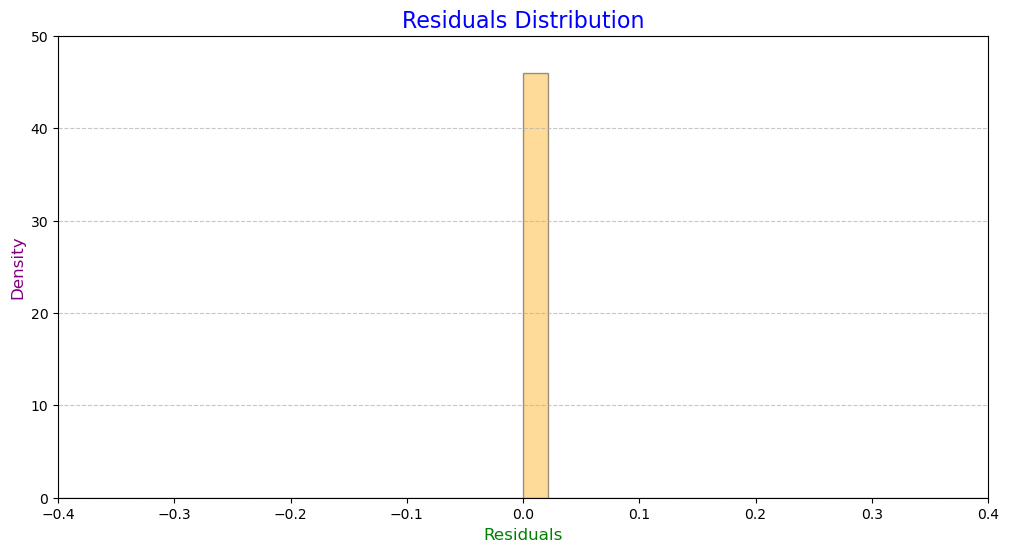


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


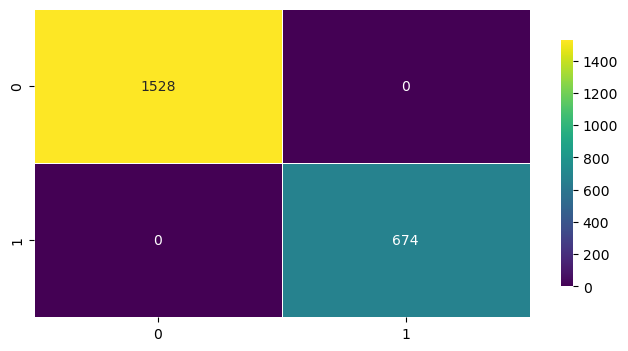

In [67]:
from sklearn.ensemble import RandomForestClassifier
evaluate_model(RandomForestClassifier(), 'Random Forest', X_train, y_train, X_test, y_test)